# THOMPSON SAMPLING

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dts = pd.read_csv("Ads_CTR_Optimisation.csv")

## Implementing Thompson Sampling

In [3]:
import random
N = len(dts)
d = len(dts.columns)
ads_selected = []
numbers_of_reward1 = [0] * d
numbers_of_reward0 = [0] * d 
total_reward = 0
for n in range(N):
    ad = 0
    max_random = 0
    for i in range(d):
        random_beta = random.betavariate(numbers_of_reward1[i] + 1, numbers_of_reward0[i] + 1)
        if (random_beta > max_random):
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dts.values[n, ad]
    if (reward == 1):
        numbers_of_reward1[ad] += 1
    else:
        numbers_of_reward0[ad] += 1
    total_reward += reward
    

## Visualising Results

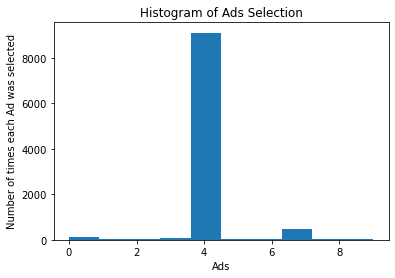

In [4]:
plt.hist(ads_selected)
plt.title("Histogram of Ads Selection")
plt.xlabel('Ads')
plt.ylabel('Number of times each Ad was selected')
plt.show()
